# IMPORTS 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("data\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
new_df = df.dropna()

print(new_df.to_string())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148             72             35        0  33.6                     0.627   50        1
1              1       85             66             29        0  26.6                     0.351   31        0
2              8      183             64              0        0  23.3                     0.672   32        1
3              1       89             66             23       94  28.1                     0.167   21        0
4              0      137             40             35      168  43.1                     2.288   33        1
5              5      116             74              0        0  25.6                     0.201   30        0
6              3       78             50             32       88  31.0                     0.248   26        1
7             10      115              0              0        0  35.3                     0.134   29        0
8

In [5]:
new_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


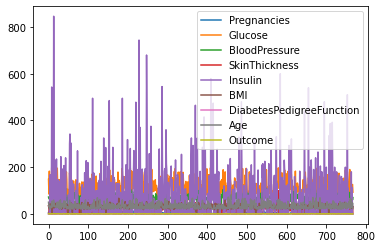

In [6]:
new_df.plot()

plt.show()

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

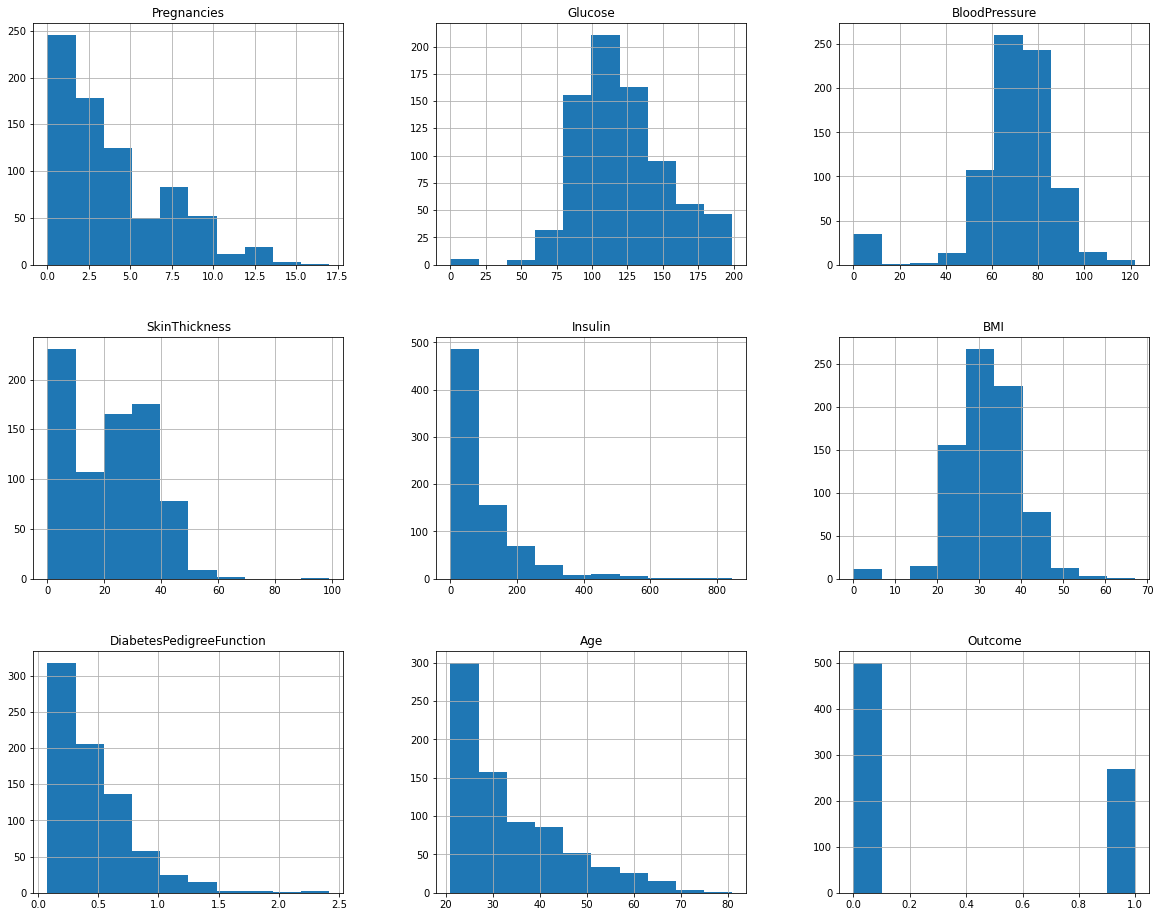

In [7]:
new_df.hist(figsize=(20,16),grid=True)

In [8]:
new_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
new_df["Outcome"].value_counts()/len(new_df)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

Text(0, 0.5, 'no of people')

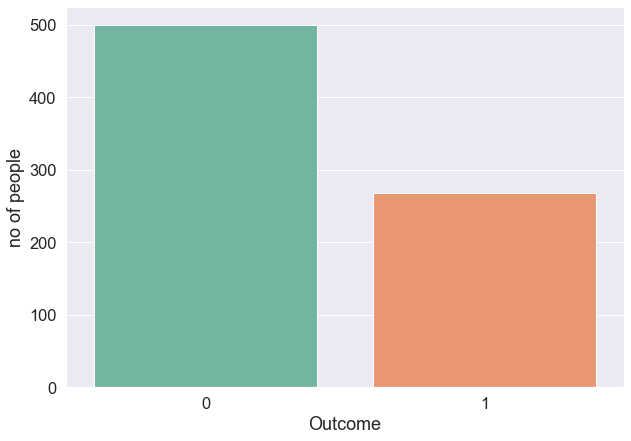

In [10]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
sns.countplot(x='Outcome',data=new_df,palette='Set2')
plt.ylabel('no of people')

In [11]:
new_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [13]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [14]:
#x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [15]:
regressor = LogisticRegression(class_weight="balanced",max_iter=1000)
regressor.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [16]:
predicted = regressor.predict(x_test)
predicted_prob = regressor.predict_proba(x_test)
print(predicted)
#print(predicted_prob)

[1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [17]:
cf= confusion_matrix(y_test,predicted)

In [18]:
cf

array([[82, 25],
       [11, 36]], dtype=int64)

In [19]:
# Print the confusion matrix
print("Confusion Matrix:")
print(cf)

# Extract values from the confusion matrix
true_positives = cf[1, 1]
true_negatives = cf[0, 0]
false_positives = cf[0, 1]
false_negatives = cf[1, 0]

# Perform further analysis or calculate performance metrics
accuracy = (true_positives + true_negatives) / sum(sum(cf))
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)
f1_score = 2 * ((precision * recall) / (precision + recall))

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)

Confusion Matrix:
[[82 25]
 [11 36]]
Accuracy: 0.7662337662337663
Precision: 0.5901639344262295
Recall: 0.7659574468085106
Specificity: 0.7663551401869159
F1 Score: 0.6666666666666666


In [20]:
# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [21]:
# Train the model
rf_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(x_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8311688311688312


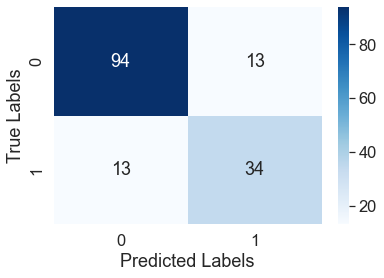

In [29]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [22]:
# Create an SVM classifier object
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the model
svm_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred1 = svm_classifier.predict(x_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)


Accuracy: 0.8181818181818182


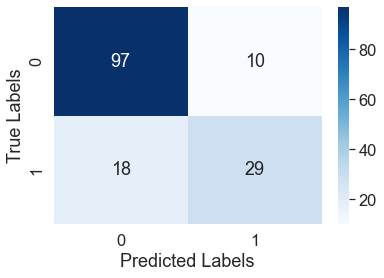

In [31]:
cm = confusion_matrix(y_test, y_pred1)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()